In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import os
from sklearn.utils import shuffle

In [2]:
m = np.zeros((16000,16384)) #matrix

In [3]:
minr = 1000000
minc = 1000000
c =0
desired_size = (128, 128)
directory = os.fsdecode('/root/autodl-tmp/verification/ROI/')
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".jpeg"): 
     #load the image, convert to grayscale and flatten the 2d image 
        img = cv2.cvtColor(cv2.imread(directory+filename), cv2.COLOR_BGR2GRAY)
#         minr = min(minr, img.shape[0])
#         minc = min(minc, img.shape[1])
        #print(c)
        img = cv2.resize(img, desired_size)
        flatten_img = np.reshape(img, (1,-1))
        m[c,:] = flatten_img
        #print(filename)
        #print(img.shape)
        #print(flatten_img.shape)
        c += 1
    else:
        continue

In [32]:
Y = np.zeros((16000, 1))
for i in range(0, 200):
    Y[i*80:(i+1)*80,:] = i+1

In [11]:
m, Y = shuffle(m, Y)

In [16]:
#80% - training
#20% - testing
x_train = m[:12800,:]
x_test = m[12800:, :]
y_train = Y[:12800, :]
y_test = Y[12800:, :]

In [17]:
#Mean normalize
mean = np.mean(x_train,0)
x_train_norm = x_train - mean[np.newaxis,:]
x_test_norm = x_test - mean[np.newaxis,:]

In [18]:
def PCA_self(X, n_pc):
    U, S, V = np.linalg.svd(X)
    components = V[:n_pc]
    projected = U[:,:n_pc]*S[:n_pc]
    return projected, components

In [19]:
def plot_portraits(images, titles, h, w, n_row, n_col):
    plt.figure(figsize=(2.2 * n_col, 2.2 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())

In [26]:
n_components = 8000
P, C = PCA_self(x_train_norm, n_pc=n_components)
# cov_matrix = np.cov(x_train_norm.T)
# print("Cov done")
# val, vec = np.linalg.eigh(cov_matrix)
# C = vec[:n_components].T
print("PCA done")

PCA done


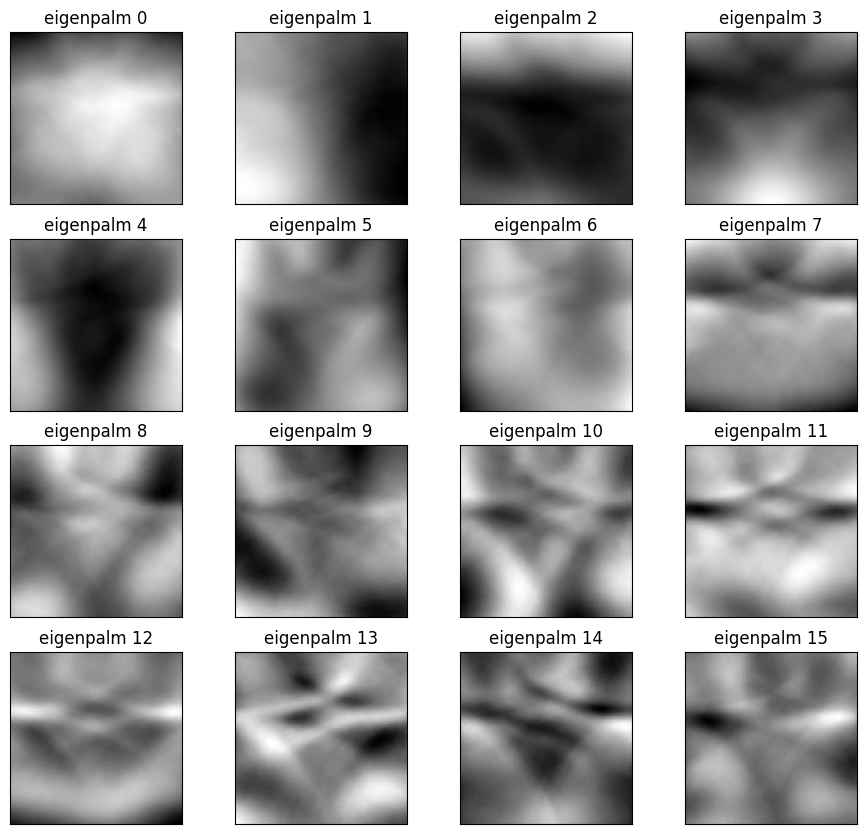

In [27]:
eigenpalms= C.reshape((n_components, 128, 128))
eigenpalm_titles = ["eigenpalm %d" % i for i in range(eigenpalms.shape[0])]
plot_portraits(eigenpalms, eigenpalm_titles, 128, 128, 4, 4) 

In [28]:
def change_basis(data_matrix, eigenvectors):
    """ This function will change the basis of data_matrix.
    The output should be a data_matrix with the eigenvectors as a new basis
    The output would have a size of (N,V) where N is the number of examples in
    data matrix and V is the number of eigenvectors"""
    I_eig = None

    # ===============================================
    # TODO: replace pass with your code
    I_eig = np.dot(data_matrix, eigenvectors)
    # ===============================================

    return I_eig


In [29]:
eigenvectors = C.T
eig_train_x = change_basis(x_train_norm, eigenvectors)
eig_test_x = change_basis(x_test_norm, eigenvectors)

In [30]:
def knn_predict(eig_train_x, eig_test_x, y_train, y_test, k=1):

    """Implement the KNN algorithm. The output should be a vector containing your predictions"""

    predictions = np.zeros_like(y_test)

    # ===============================================
    # TODO: replace pass with your code
    train_n = eig_train_x.shape[0]
    test_n = eig_test_x.shape[0]
    for i in range(test_n):
        curr_test = eig_test_x[i,:]
        mini = -1
        min_dist = 100000
        for j in range(train_n):
            curr_dist = np.linalg.norm(curr_test - eig_train_x[j,:])
            if curr_dist < min_dist:
                mini = j
                min_dist = curr_dist
        predictions[i] = y_train[mini]
    # ===============================================

    return predictions

In [87]:
y_train_copy = y_train.flatten().copy()
y_test_copy = y_test.flatten().copy()

In [88]:
predictions = knn_predict(eig_train_x, eig_test_x, y_train_copy, y_test_copy, k=1)
accuracy = np.sum(predictions == y_test_copy)/y_test_copy.size
print("Accuracy: ", accuracy*100, "%")

Accuracy:  0.34375 %


array([ 70.,  98., 152., 172., 123.,  15., 191., 172., 123.,  98.])

In [31]:
predictions = knn_predict(eig_train_x, eig_test_x, y_train, y_test, k=1)
accuracy = np.sum(predictions == y_test)/y_test.size
print("Accuracy: ", accuracy*100, "%")

Accuracy:  0.71875 %


In [34]:
y_test_copy = y_test.flatten().copy()

In [70]:
eig_train_x[0]

array([1287.67758805,   34.84233183, 1145.53709208,  237.43818076,
       -285.03069217, -461.0313411 ,  220.14386454,   12.47027245,
       -112.86072481,  141.27855222,  -28.84141346,  119.13628269,
        -18.95920095,   13.27208741,  -21.57437506,  -12.6156902 ,
         22.46640856,  -30.04411798,   43.4666607 ,  -47.67126742,
         47.88551187, -115.84245038,  106.86545412,  -58.45248623,
        209.48592321,  -77.47566293,  116.99189646,  -64.61966393,
         88.85215839,  -35.96740606,   48.28949278,  -37.82617635,
       -112.58039568,   25.53226446,   37.17380305,  -53.15638117,
        -20.72290619,   42.26619072,   88.10432202, -185.4977458 ,
        -55.07535749,  -33.91631385,   78.82437268,    1.54091187,
         -4.43704813,    4.15694134,  -90.76826803,   76.30548577,
        -49.31913588,   73.61153182])

In [71]:
y_train_copy[0]

55.0

In [34]:
import pickle

# Save variables to a file
with open('eigenvectors.pkl', 'wb') as file:
    pickle.dump(eigenvectors, file)
with open('eig_train_x.pkl', 'wb') as file:
    pickle.dump(eig_train_x, file)
with open('eig_test_x.pkl', 'wb') as file:
    pickle.dump(eig_test_x, file)
